In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import scipy.stats as sts
from matplotlib import rc,rcParams
rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
rcParams['font.family'] = "sans-serif"


In [2]:
direc = 'C:/Users/Bas/Google Drive/Bas Games/Analysis/Move Statistics/'
fig_direc = 'C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Manuscripts/Paper/Figures/'

data_sets = ['hvh','gen','eye','learn1','learn2','learn3','tai1','tai2']

stats_human = [np.loadtxt(direc + 'move_stats_' + data + '.txt') 
         for data in data_sets]

stats_model = [np.loadtxt(direc + 'initial_moves_' + data + '.txt')  
                       for data in data_sets]

initial_moves_human = [[s[np.logical_and(s[:,0]==i,s[:,3]==0),4].astype('int')
                       for i in np.unique(s[:,0])] for s in stats_human]

initial_moves_model = [[s[5*i:5*i+5,:].flatten().astype('int')
                        for i in range(s.shape[0]//5)] for s in stats_model]

data_sets = ['hvh','gen','eye','learn1','learn2','learn3','learn4','learn5','tai1','tai2','tai3']

data_names = ['Human-vs-human','Generalization','Eye tracking','Learning session 1',
             'Learning session 2','Learning session 3','Learning session 4','Learning session 5',
             'Time pressure 5-second','Time pressure 10-second','Time pressure 20-second']

initial_moves_human = initial_moves_human[0:3] + \
                      [sum(initial_moves_human[3:6],[])[i::5] for i in range(5)] + \
                      [sum(initial_moves_human[6:8],[])[i::3] for i in range(3)]
        
initial_moves_model = initial_moves_model[0:3] + \
                      [sum(initial_moves_model[3:6],[])[i::5] for i in range(5)] + \
                      [sum(initial_moves_model[6:8],[])[i::3] for i in range(3)]

In [3]:
def pad_to_36(x):
    if len(x)<36:
        return np.append(x,[0]*(36-len(x)))
    return x

def plot_move_hist(m,title,show_corners,filename,letter):
    fig,ax = plt.subplots()
    ax.set_title(title,fontsize=24)
    h = np.reshape(pad_to_36(np.bincount(m)/np.prod(m.shape)),[4,9])
    for i in np.arange(0.5,9.5,1):
        ax.axvline(i,color='gray')
    for i in np.arange(0.5,4.5,1):
        ax.axhline(i,color='gray')
    ax.set_xticks(np.arange(1,10,1))
    ax.set_yticks(np.arange(1,5,1))
    ax.tick_params(axis=u'both', which=u'both',length=0,labelsize=18)
    ax.text(0.02, 0.9, letter, horizontalalignment='left',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)

    if show_corners:
        ax.text(1,1,"C",ha ='center',va='center',fontsize=24)
        ax.text(9,1,"C",ha ='center',va='center',fontsize=24)
        ax.text(1,4,"C",ha ='center',va='center',fontsize=24)
        ax.text(9,4,"C",ha ='center',va='center',fontsize=24)
        ax.text(1,2,"N",ha ='center',va='center',fontsize=24)
        ax.text(9,2,"N",ha ='center',va='center',fontsize=24)
        ax.text(1,3,"N",ha ='center',va='center',fontsize=24)
        ax.text(9,3,"N",ha ='center',va='center',fontsize=24)
    else: 
        ax.tick_params(axis=u'both', which=u'both',labelcolor='white')


    cax = ax.imshow(h,interpolation = 'nearest',cmap = 'Greens', vmin=0,vmax=0.2,
                    origin='bottom',extent=[0.5,9.5,0.5,4.5])
    fig.tight_layout()
    fig.savefig(fig_direc + filename)
    plt.show()
    
def get_corner_frequency(m):
    h = np.reshape(pad_to_36(np.bincount(m)/np.prod(m.shape)),[4,9])    
    return h[0,0]+h[0,-1]+h[-1,0]+h[-1,-1]

def get_next_to_corner_frequency(m):
    h = np.reshape(pad_to_36(np.bincount(m)/np.prod(m.shape)),[4,9])    
    return h[1,0]+h[1,-1]+h[-2,0]+h[-2,-1]

def get_left_bias(m):
    h = np.reshape(pad_to_36(np.bincount(m)/np.prod(m.shape)),[4,9])    
    return np.sum(h[:,:4])-np.sum(h[:,-4:])

def get_mean_coordinate(m):
    return np.mean([[mm%9,mm//9] for mm in m],axis=0)


C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


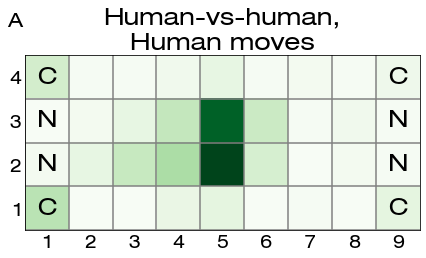

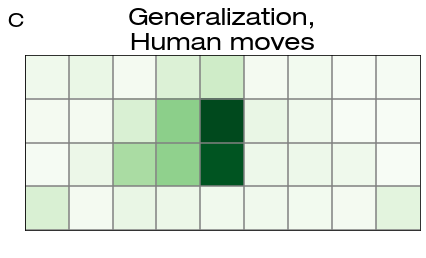

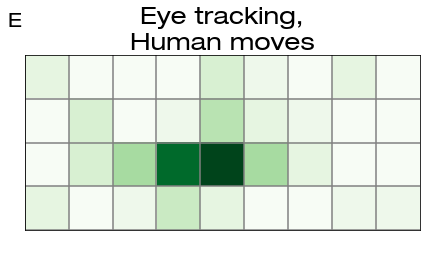

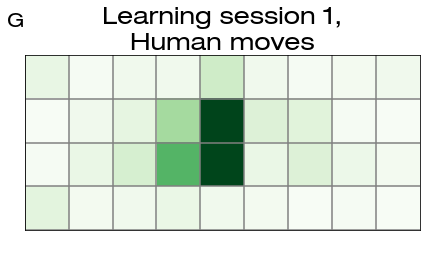

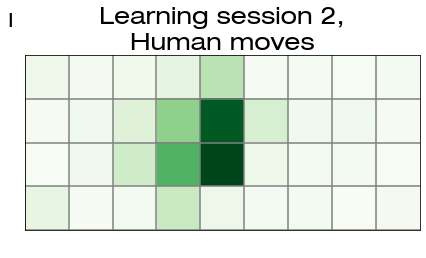

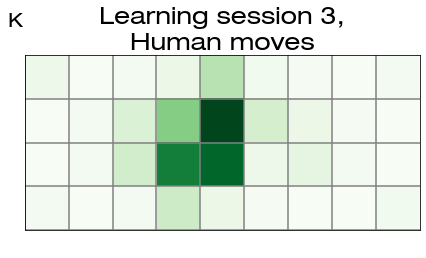

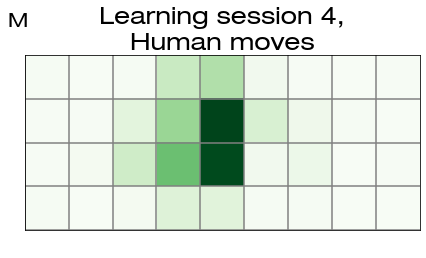

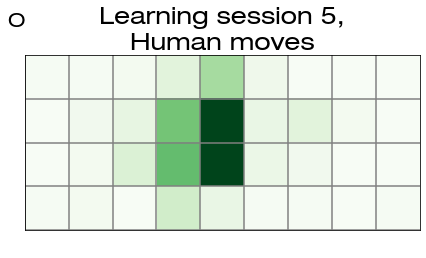

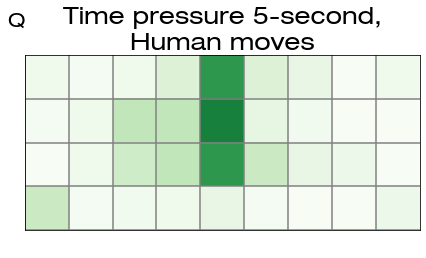

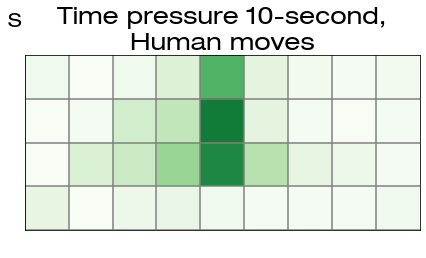

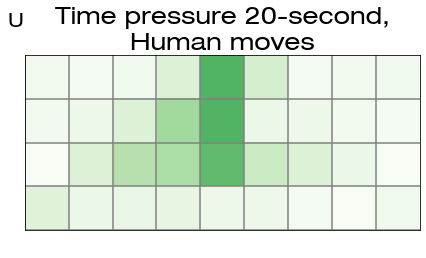

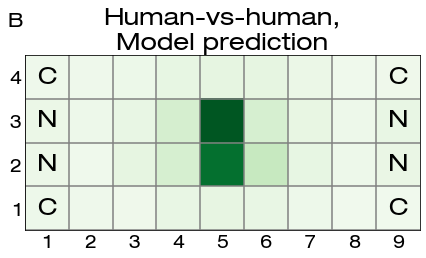

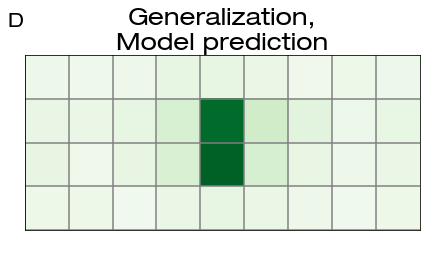

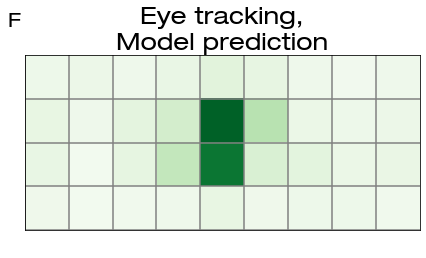

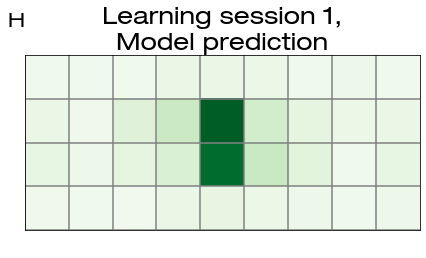

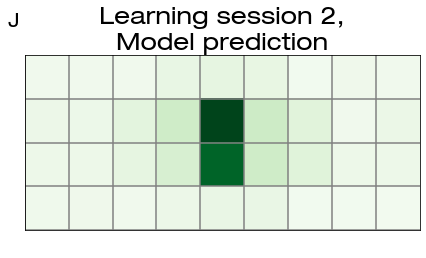

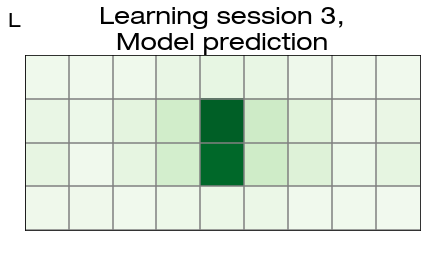

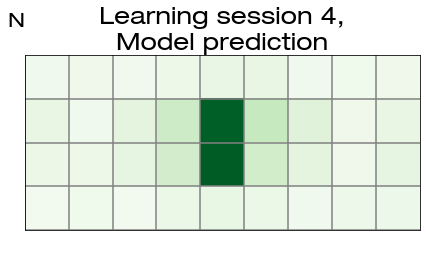

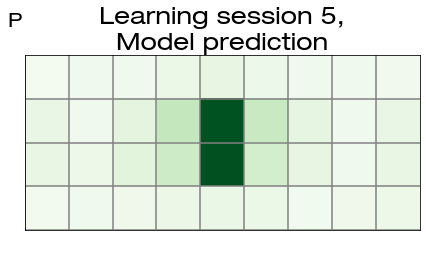

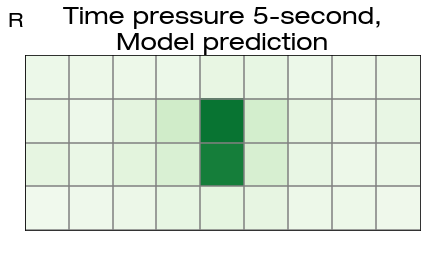

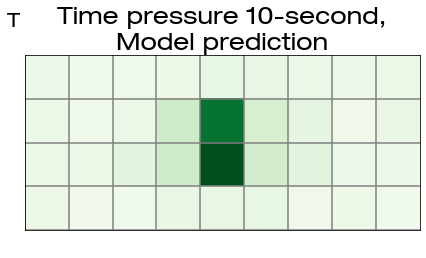

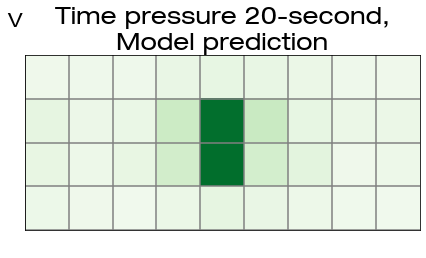

In [4]:
import string
N = len(data_sets)
letters = list(string.ascii_uppercase)

for human_moves,letter,d in zip(initial_moves_human,letters[:2*N:2],data_names):
    plot_move_hist(np.hstack(human_moves),d + ",\nHuman moves",d=='Human-vs-human','opening_' + letter + '.pdf',letter)
for model_moves,letter,d in zip(initial_moves_model,letters[1:2*N:2],data_names):
    plot_move_hist(np.hstack(model_moves),d + ",\nModel prediction",d=='Human-vs-human','opening_' + letter + '.pdf',letter)


C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


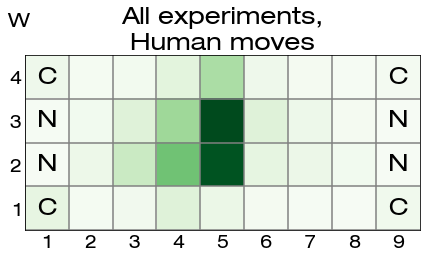

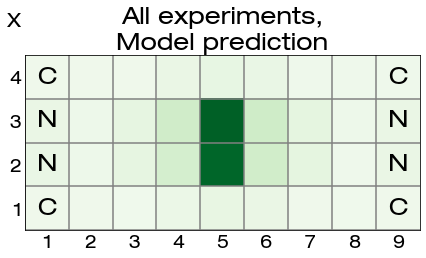

In [5]:
plot_move_hist(np.hstack([np.hstack(s) for s in initial_moves_human]),'All experiments,\nHuman moves',True,'opening_W.pdf','W')
plot_move_hist(np.hstack([np.hstack(s) for s in initial_moves_model]),'All experiments,\nModel prediction',True,'opening_X.pdf','X')

In [6]:
f_hum_corn = [[get_corner_frequency(ss) for ss in s] for s in initial_moves_human]
f_mod_corn = [[get_corner_frequency(ss) for ss in s] for s in initial_moves_model]

f_hum_nextcorn = [[get_next_to_corner_frequency(ss) for ss in s] for s in initial_moves_human]
f_mod_nextcorn = [[get_next_to_corner_frequency(ss) for ss in s] for s in initial_moves_model]

f_hum_corn = [[get_corner_frequency(ss) for ss in s] for s in initial_moves_human]
f_mod_corn = [[get_corner_frequency(ss) for ss in s] for s in initial_moves_model]

hum_left_bias = [[get_left_bias(ss) for ss in s] for s in initial_moves_human]
mod_left_bias = [[get_left_bias(ss) for ss in s] for s in initial_moves_model]

hum_mean_coord = [[get_mean_coordinate(ss) for ss in s] for s in initial_moves_human]
mod_mean_coord = [[get_mean_coordinate(ss) for ss in s] for s in initial_moves_model]

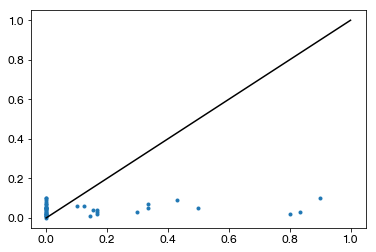

SpearmanrResult(correlation=0.072503494299206925, pvalue=0.65661056631390924)


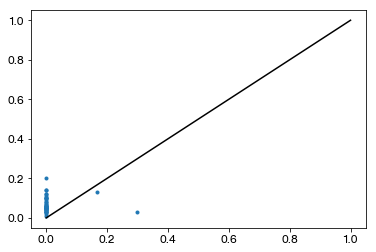

SpearmanrResult(correlation=0.0019986130690182527, pvalue=0.99023452655963384)
0.0495483409707
-0.0286060606061


In [7]:
plt.plot(f_hum_corn[0],f_mod_corn[0],'.')
plt.plot([0,1],[0,1],'-k')
plt.show()
print(sts.spearmanr(f_hum_corn[0],f_mod_corn[0]))

plt.plot(f_hum_nextcorn[0],f_mod_nextcorn[0],'.')
plt.plot([0,1],[0,1],'-k')
plt.show()
print(sts.spearmanr(f_hum_nextcorn[0],f_mod_nextcorn[0]))

print(np.mean(sum(f_hum_corn,[]))-np.mean(sum(f_hum_nextcorn,[])))
print(np.mean(sum(f_mod_corn,[]))-np.mean(sum(f_mod_nextcorn,[])))

#for d,f1,f2,f3,f4 in zip(data_sets,f_hum_corn,f_mod_corn,f_hum_nextcorn,f_mod_nextcorn):
#    print(d,"human corner:",np.mean(f1),np.std(f1)/np.sqrt(len(f1)))
#    print(d,"model corner:",np.mean(f2),np.std(f2)/np.sqrt(len(f2)))
#    print(d,"human next to corner:",np.mean(f3),np.std(f3)/np.sqrt(len(f3)))
#    print(d,"model next to corner:",np.mean(f4),np.std(f4)/np.sqrt(len(f4)))

In [8]:
def scatter_plot(x,y,title,filename,r,letter):
    fig,ax=plt.subplots()
    ax.plot(x,y,'.k')
    ax.set_title(title)
    ax.set_xlabel('Model prediction')
    ax.set_xlim(r)
    ax.set_ylim(r)
    ax.text(0.02, 0.9, letter, horizontalalignment='left',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('Data')
    ax.plot(r,r,'-k')
    print(sts.spearmanr(x,y))
    fig.tight_layout()
    fig.savefig(fig_direc + filename)
    plt.show()

SpearmanrResult(correlation=0.090932386750725014, pvalue=0.099143791708234549)


C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


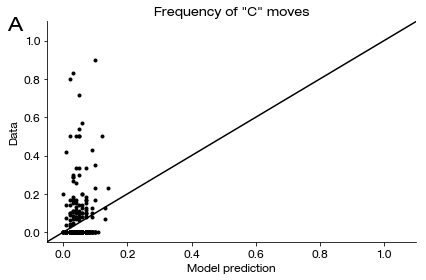

SpearmanrResult(correlation=-0.053047043863975005, pvalue=0.33671942687989331)


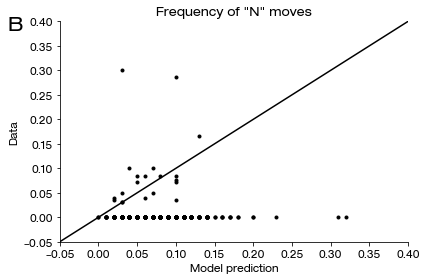

SpearmanrResult(correlation=0.12106186245964265, pvalue=0.027881706250196557)


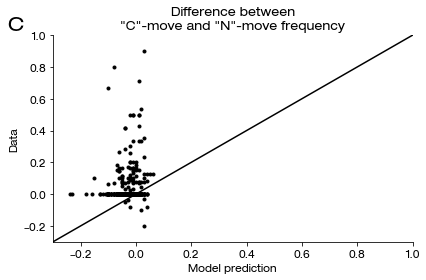

In [9]:
scatter_plot(np.hstack(f_mod_corn),np.hstack(f_hum_corn),'Frequency of \"C\" moves','opening2_A.pdf',[-0.05,1.1],'A')
scatter_plot(np.hstack(f_mod_nextcorn),np.hstack(f_hum_nextcorn),'Frequency of \"N\" moves','opening2_B.pdf',[-0.05,0.4],'B')
scatter_plot(np.hstack(f_mod_corn)-np.hstack(f_mod_nextcorn),np.hstack(f_hum_corn)-np.hstack(f_hum_nextcorn),
             'Difference between\n\"C\"-move and \"N\"-move frequency','opening2_C.pdf',[-0.3,1],'C')

C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


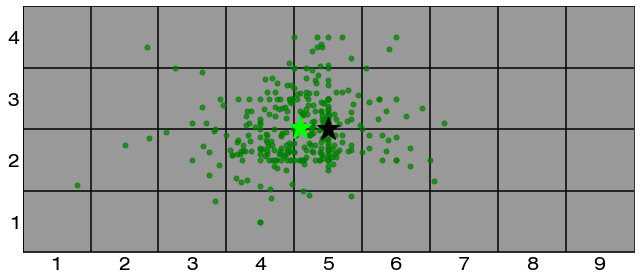

[ 3.59191618  1.52243256] [ 0.03937911  0.02941152]


In [10]:
x = np.vstack(hum_mean_coord)
fig,ax=plt.subplots(figsize=(9,4))

ax.add_patch(patches.Rectangle((0.5,0.5),9,4,color='#999999'))


for i in np.arange(0.5,9.5,1):
    ax.axvline(i,color='black')
for i in np.arange(0.5,4.5,1):
    ax.axhline(i,color='black')
ax.set_xticks(np.arange(1,10,1))
ax.set_yticks(np.arange(1,5,1))
ax.plot(x[:,0]+1,x[:,1]+1,'.',color='green',alpha=0.7,markersize=10)
ax.plot([5],[2.5],'*k',markersize=24)
ax.plot(np.mean(x[:,0])+1,np.mean(x[:,1])+1,'*',color='lime',markersize=24)
ax.set_xlim([0.5,9.5])
ax.set_ylim([0.5,4.5])
ax.tick_params(axis=u'both', which=u'both',length=0,labelsize=18)
plt.tight_layout()
fig.savefig(fig_direc + 'opening3.pdf')
plt.show()

print(np.mean(x,axis=0),np.std(x,axis=0)/np.sqrt(x.shape[0]))


In [11]:
print(np.mean(np.vstack(mod_mean_coord),axis=0))
print(np.mean(np.vstack(hum_mean_coord),axis=0))


[ 4.01215152  1.5139697 ]
[ 3.59191618  1.52243256]


In [12]:
from itertools import groupby

def coincidence_prob(x):    
    if len(x)>1:
        return sum([n*(n-1) for n in [len(list(group)) 
                                      for key, group in groupby(sorted(x))]])/len(x)/(len(x)-1)
    else:
        return np.nan

def num_consecutive(x):
    if len(x)>1:
        return np.mean([a==b for a,b in zip(x[1:],x)])
    else:
        return np.nan

CP_human = [[coincidence_prob(ss) for ss in s] for s in initial_moves_human]
NC_human = [[num_consecutive(ss) for ss in s] for s in initial_moves_human]

C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


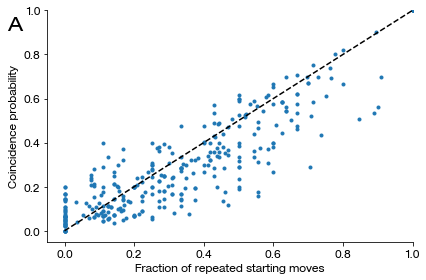

In [23]:
fig,ax=plt.subplots()
ax.plot(sum(NC_human,[]),sum(CP_human,[]),'.')
ax.set_xlabel('Model prediction')
ax.set_xlim([-0.05,1])
ax.set_ylim([-0.05,1])
ax.set_ylabel('Coincidence probability')
ax.set_xlabel('Fraction of repeated starting moves')
ax.plot([0,1],[0,1],'--k')
ax.text(0.02, 0.9, 'A', horizontalalignment='left',
    verticalalignment='center', transform=fig.transFigure, fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(fig_direc + 'serial_A.pdf')
plt.show()


In [14]:
print(np.nanmean(sum(NC_human,[])),np.nanstd(sum(NC_human,[]))/\
      np.sqrt(np.sum(~np.isnan(sum(NC_human,[])))))
print(np.nanmean(sum(CP_human,[])),np.nanstd(sum(CP_human,[]))/\
      np.sqrt(np.sum(~np.isnan(sum(CP_human,[])))))

print(sts.ttest_rel(sum(NC_human,[]),sum(CP_human,[]),nan_policy='omit'))



0.325653993898 0.0139141313256
0.2894521215 0.0124323136704
Ttest_relResult(statistic=5.5612326235033471, pvalue=5.5623832925052068e-08)


In [15]:

from itertools import zip_longest

def get_sub_id(l):
    i = l.find("subj")
    if i==-1:
        return -1
    j = l.find("sess")
    if j>0:
        return 5*int(l[i+4:i+6]) + int(l[j+4:j+6])
    j = l.find("cond")
    if j>0:
        return int(l[i+4:i+6])   
    return int(l[i+4:i+7])    

def get_player_score(g):
    player_id = max(get_sub_id(g[0]),get_sub_id(g[1]))
    player_started = get_sub_id(g[1])==-1
    player_score = (1 if player_started else -1)*(1 if g[3]=="1-0" else 0 if g[3]=="1/2-1/2" else -1)
    return player_id,player_started,player_score

def read_game_results(filename):
    with open(filename,'r') as f:
        return [get_player_score(g) for g in zip_longest(*([iter(f.read().splitlines())] * 5))]

In [16]:
def consecutive_by_result(x,results):
    consec = [a==b for a,b in zip(x,x[1:])]
    last_result = [prev[2] for prev,curr in zip(results,results[2:]) if curr[1]]
    if(len(consec)!=len(last_result)):
        print("unequal length: ",len(consec),len(last_result))
        return [np.nan for r in [-1,0,1]]
    return [np.mean([c for c,l in zip(consec,last_result) if l==r]) for r in [-1,0,1]]



In [17]:
direc = 'C:/Users/Bas/Google Drive/Bas Games/Analysis/Ratings/'
results_eye = read_game_results(direc + 'games_results_eye.pgn')
results_gen = read_game_results(direc + 'games_results_gen.pgn')
results_learn = read_game_results(direc + 'games_results_learn.pgn')
results_tai = read_game_results(direc + 'games_results_tai.pgn')

NC_by_res_gen = np.array([consecutive_by_result(initial_moves,[r for r in results_gen if r[0]==i]) 
                          for i,initial_moves in enumerate(initial_moves_human[1])])

NC_by_res_eye = np.array([consecutive_by_result(initial_moves,[r for r in results_eye if r[0]==i])
                          for i,initial_moves in enumerate(initial_moves_human[2])])

NC_by_res_learn = np.array([[consecutive_by_result(initial_moves,[r for r in results_learn if r[0]==5*i+j]) 
                    for i,initial_moves in enumerate(initial_moves_learn)]
                   for j,initial_moves_learn in enumerate(initial_moves_human[3:8])])


C:\Users\Bas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Bas\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


unequal length:  8 7
unequal length:  12 11


In [18]:
NC_after_win = np.hstack([NC_by_res_eye[:,2],NC_by_res_gen[:,2],NC_by_res_learn[:,:,2].flatten()])
NC_after_draw = np.hstack([NC_by_res_eye[:,1],NC_by_res_gen[:,1],NC_by_res_learn[:,:,1].flatten()])
NC_after_loss = np.hstack([NC_by_res_eye[:,0],NC_by_res_gen[:,0],NC_by_res_learn[:,:,0].flatten()])

print(sts.ttest_rel(NC_after_win,NC_after_loss,nan_policy = 'omit'))
print(sts.ttest_rel(NC_after_win,NC_after_draw,nan_policy = 'omit'))

print(np.nanmean(NC_after_win),np.nanstd(NC_after_win)/np.sqrt(sum(~np.isnan(NC_after_win))))
print(np.nanmean(NC_after_loss),np.nanstd(NC_after_loss)/np.sqrt(sum(~np.isnan(NC_after_loss))))
print(np.nanmean(NC_after_draw),np.nanstd(NC_after_draw)/np.sqrt(sum(~np.isnan(NC_after_draw))))

                 

Ttest_relResult(statistic=2.0461752075420239, pvalue=0.042109545293375218)
Ttest_relResult(statistic=-0.38129481843913743, pvalue=0.70362163682467804)
0.381009465397 0.0211319103403
0.339337333673 0.0228361715879
0.407459077381 0.0386034568569


C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


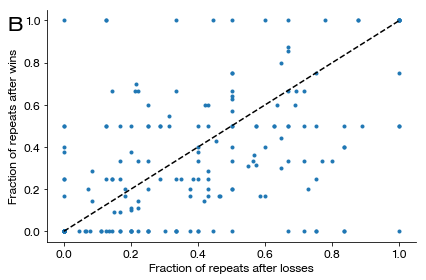

In [24]:
fig,ax=plt.subplots()
ax.plot(NC_after_win,NC_after_loss,'.')
ax.set_xlabel('Model prediction')
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_ylabel('Fraction of repeats after wins')
ax.set_xlabel('Fraction of repeats after losses')
ax.plot([0,1],[0,1],'--k')
ax.text(0.02, 0.9, 'B', horizontalalignment='left',
    verticalalignment='center', transform=fig.transFigure, fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
fig.savefig(fig_direc + 'serial_B.pdf')
plt.show()

In [20]:
np.nanmean(sum(NC_human,[]))

0.32565399389803579

In [21]:
(len(results_gen)+len(results_learn)+len(results_eye))/2/200

15.3275

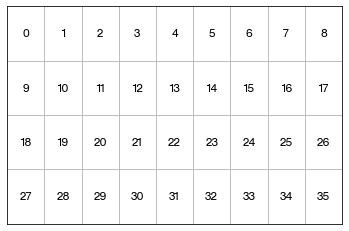

In [22]:
fig,ax=plt.subplots()
ax.set_xlim([-0.5,8.5])
ax.set_ylim([-0.5,3.5])
ax.set_xticks(np.arange(0.5,8.5,1))
ax.set_yticks(np.arange(0.5,3.5,1))
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.grid()
for i in range(36):
    ax.text(i%9,3-i//9,str(i),ha="center",va="center")
plt.show()